## Viral Tweets
The aim of the project is to predict whether a tweet will go viral using the K-Nearest Neighbor algorithm.

In [1]:
import pandas as pd
# downloading tweets dataset in a data frame
tweets = pd.read_json(r'C:\Users\iplot\Desktop\codecademy_projects\twitter_classification\random_tweets.json', lines = True)

In [6]:
# examining the data
# print(tweets.info())
pd.set_option('display.max_columns', None)
print(tweets.columns)
print(tweets.head(2))

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'extended_entities', 'quoted_status',
       'withheld_in_countries'],
      dtype='object')
                 created_at                   id               id_str  \
0 2018-07-31 13:34:40+00:00  1024287229525598210  1024287229525598208   
1 2018-07-31 13:34:40+00:00  1024287229512953856  1024287229512953856   

                                                text  truncated  \
0  RT @KWWLStormTrack7: We are more than a month ...      False   
1  @hail_ee23 Thanks love its just the feeling of...

In [5]:
print(tweets.loc[0]['user'])

{'id': 145388018, 'id_str': '145388018', 'name': 'Derek Wolkenhauer', 'screen_name': 'derekw221', 'location': 'Waterloo, Iowa', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 215, 'friends_count': 335, 'listed_count': 2, 'created_at': 'Tue May 18 21:30:10 +0000 2010', 'favourites_count': 3419, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 4475, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '022330', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme15/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme15/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/995790590276243456/cgxRVviN_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/995790590276243456/c

In [7]:
print(tweets.loc[0]['text'])

RT @KWWLStormTrack7: We are more than a month into summer but the days are getting shorter. The sunrise is about 25 minutes later on July 3…


To determine whether a tweet was viral or not we can use the 'retweet_count' column. If we find the median value for retweets, we can devide all the tweets in two categories (or label them): 1 - viral (the number of retweets is more than the median) and, otherwise, 0 - not viral.

In [8]:
import numpy as np

med_num_retweet = tweets['retweet_count'].median()
print(med_num_retweet)

13.0


In [10]:
tweets['is_viral'] = np.where(tweets['retweet_count'] > med_num_retweet, 1, 0)
# checking out the number of tweets that went viral
print(tweets['is_viral'].value_counts())

0    5562
1    5537
Name: is_viral, dtype: int64


Now that the tweets were labeled, it's time to find out which features determine whether a tweet is viral. These might be:

- The number of friends.
- The number of followers.
- The length of a tweet.
- The number of hashtags in the tweet. 
- The number of links in the tweet.

To represent these features we can create new columns in the dataset.

In [48]:
tweets['tweet_length'] = tweets.apply(lambda tweet: len(tweet['text']), axis=1)
tweets['friends_count'] = tweets.apply(lambda tweet: tweet['user']['friends_count'], axis=1)
tweets['followers_count'] = tweets.apply(lambda tweet: tweet['user']['followers_count'], axis=1)
tweets['hashtags_count'] = tweets.apply(lambda tweet: tweet['text'].count('#'), axis=1)
tweets['links_count'] = tweets.apply(lambda tweet: tweet['text'].count('http'), axis=1)

In [49]:
# prepearing data for K-Nearest Neighbor algorithm
labels = tweets['is_viral']
data = tweets[['tweet_length', 'friends_count', 'followers_count', 'hashtags_count', 'links_count']]

In [50]:
# normalizing the data so that all of the features vary within the same range
from sklearn.preprocessing import scale
scaled_data = scale(data, axis = 0)
# getting a sense of how the new scaled data looks like
print(scaled_data[:6])

[[ 0.6164054  -0.14483305 -0.02878298 -0.32045057 -0.78415588]
 [-1.64577622 -0.16209787 -0.02886246 -0.32045057 -0.78415588]
 [ 0.6164054  -0.11566596 -0.02887736 -0.32045057 -0.78415588]
 [ 0.6164054   0.1085151  -0.01339342 -0.32045057 -0.78415588]
 [ 0.6164054  -0.15294228 -0.02923006 -0.32045057 -0.78415588]
 [ 0.58049776 -0.1237752  -0.02921516 -0.32045057 -0.78415588]]


In [51]:
# splitting the data into train and test sets
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(scaled_data, labels, test_size = 0.2, random_state = 1)

In [57]:
# creating a KNeighborsClassifier object
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 22)
classifier.fit(train_data, train_labels)
print(classifier.score(test_data, test_labels))

0.7360360360360361


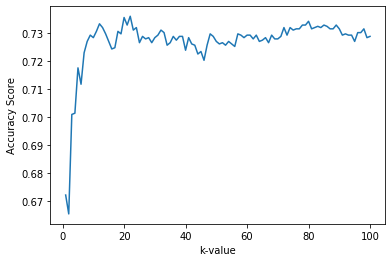

In [53]:
# testing whether another k value fits in better with the algorithm
scores = []
for k in range(1, 101):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))

# plotting the results
import matplotlib.pyplot as plt
plt.plot(range(1, 101), scores)
plt.xlabel('k-value')
plt.ylabel('Accuracy Score')
plt.show()

The plot shows that with k-value equal to 22 the K-Nearest Neighbor algorithm can predict whether a tweet will go viral with the accuracy score 0.74.